In [10]:
print(df.columns.tolist())


['id', 'name', 'gender', 'age', 'degree', 'stream', 'college_name', 'placement_status', 'salary', 'gpa', 'years_of_experience', 'salary_log']


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('../outputs/cleaned_data.csv')



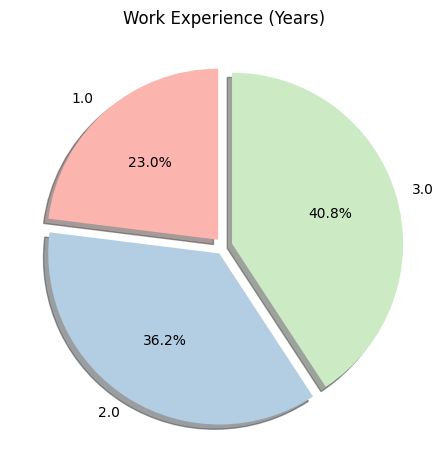

In [14]:
import matplotlib.pyplot as plt

# Count value occurrences
experience_counts = df['years_of_experience'].value_counts().sort_index()

# Plot pie chart with automatic labels
experience_counts.plot.pie(
    autopct='%1.1f%%',
    title='Work Experience (Years)',
    startangle=90,
    shadow=True,
    explode=[0.05]*len(experience_counts),  # Slightly separate each slice
    colors=plt.cm.Pastel1.colors  # Optional: use a pastel color palette
)

plt.ylabel('')
plt.tight_layout()
plt.savefig('../outputs/plots/pie_workex.png')
plt.show()


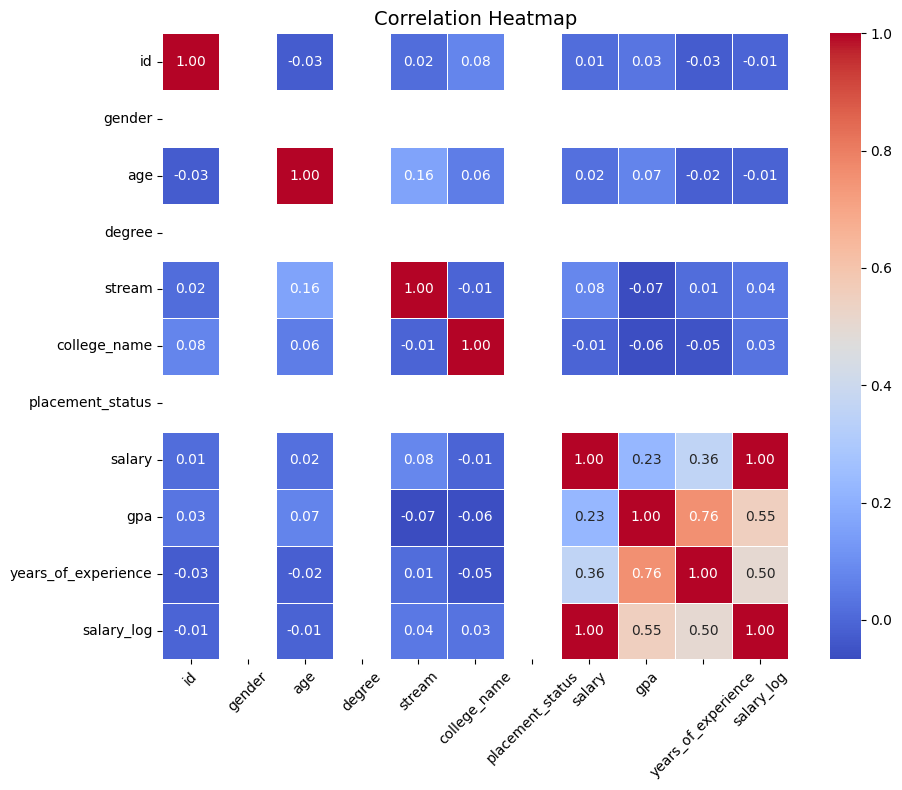

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and plot heatmap with correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)  # Ensure only numeric columns are considered

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor='white'
)

plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../outputs/plots/heatmap.png')
plt.show()


In [18]:
import plotly.express as px

# Add readable labels for placement status
df['status_label'] = df['placement_status'].map({1: 'Placed', 0: 'Not Placed'})

# Interactive scatter plot
fig = px.scatter(
    df,
    x="gpa",  # assuming you meant gpa (because there's no 'ssc_p' in your columns either)
    y="salary",
    color="status_label",
    title="GPA vs Salary (Interactive)",
    labels={
        "gpa": "GPA",
        "salary": "Salary (INR)",
        "status_label": "Placement Status"
    },
    hover_data=["name", "degree", "stream"]
)

fig.update_layout(template="plotly_white")
fig.show()


## Insight 1:
Bar chart shows that students with certain degrees tend to have higher salaries.

## Insight 2:
Heatmap reveals that MBA percentage has the strongest correlation with salary, indicating performance in MBA is crucial.

## Insight 3:
Pie chart shows only ~20% had prior work experience, but they tend to get placed more.
